In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
usArrest = pd.read_csv("USArrests.csv")

In [3]:
usArrest[0:5]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df = usArrest.copy()
df.index = df['Unnamed: 0'] # df.index = df.iloc[:, 0]
df = df.drop(columns=['Unnamed: 0']) # df.iloc[:, 1:]

In [7]:
df.index.name = 'State'

In [18]:
df.index.name = None

In [19]:
df[:5]

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

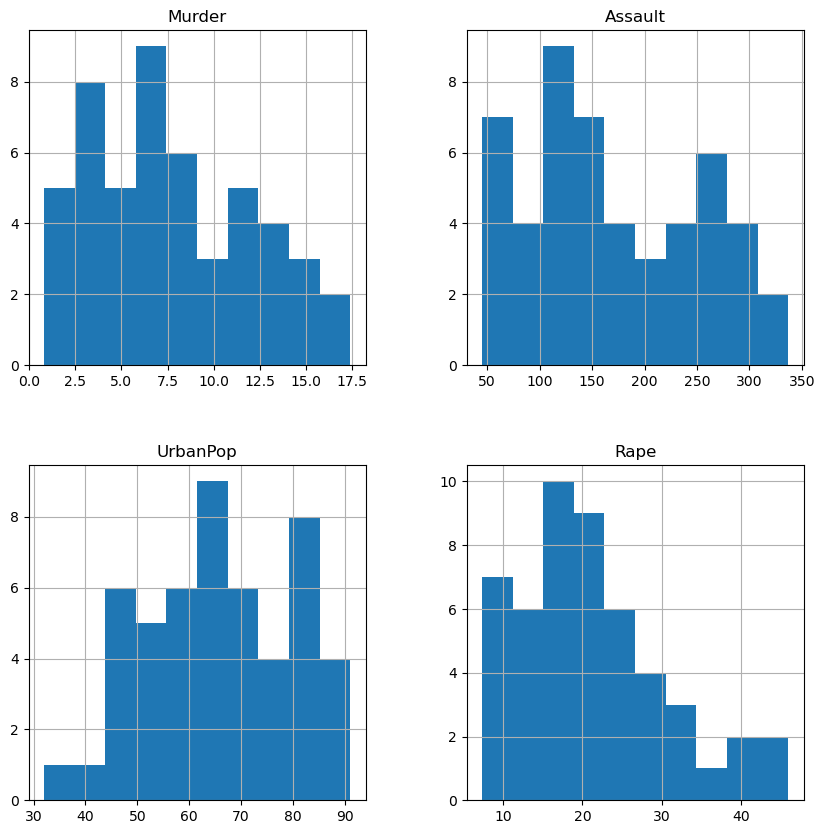

In [22]:
df.hist(figsize=(10, 10))

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [24]:
kmeans_model = kmeans.fit(df)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
kmeans_model.n_clusters

4

In [26]:
kmeans_model.cluster_centers_

array([[ 12.26666667, 251.75      ,  67.58333333,  28.40833333],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  7.50769231, 170.38461538,  71.46153846,  22.61538462],
       [ 11.84      , 310.2       ,  68.4       ,  27.78      ]])

In [27]:
kmeans_model.labels_

array([0, 0, 3, 2, 0, 2, 1, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 3, 0, 3, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [28]:
#visualization

kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
clusters = k_fit.labels_

In [32]:
cluster_centers = k_fit.cluster_centers_

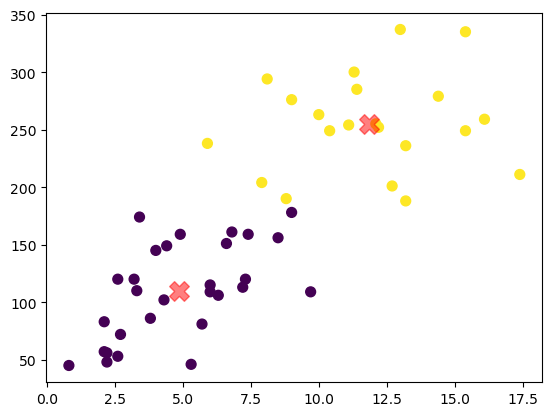

In [34]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [43]:
!pip install --upgrade matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.0 MB/s eta 0:00:06
   -------------- ------------------------- 2.9/8.1 MB 1.2 MB/s eta 0:00:05
   ---------------- -------------

ERROR: Could not install packages due to an OSError: [WinError 32] Dosya başka bir işlem tarafından kullanıldığından bu işlem dosyaya erişemiyor: 'c:\\users\\lenovo\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [44]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
# clusters and observations

In [49]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
pd.DataFrame({"state": df.index, "cluster": clusters})[:10]

,state,cluster
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [55]:
df["clusterNo"] = clusters

In [56]:
df.head()

,Murder,Assault,UrbanPop,Rape,clusterNo
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [57]:
df["clusterNo"] = df["clusterNo"] + 1

In [58]:
df.head()

,Murder,Assault,UrbanPop,Rape,clusterNo
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


In [ ]:
#%pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

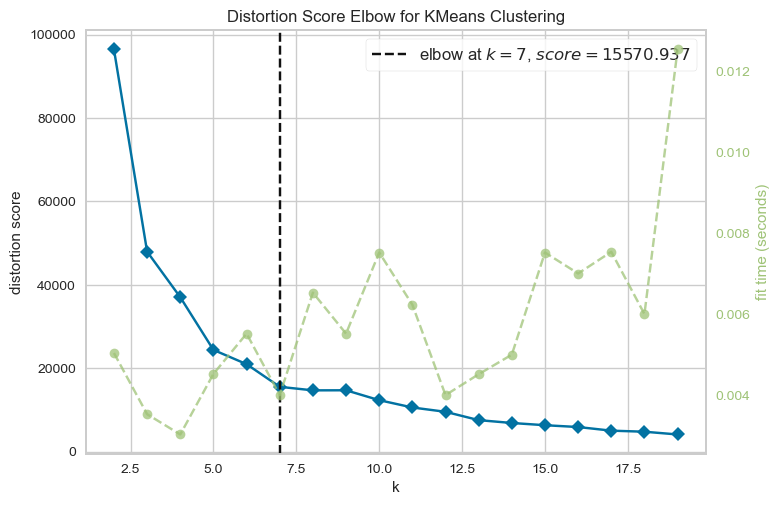

In [68]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df)
visualizer.poof();

In [71]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)
cluster = k_fit.labels_

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
pd.DataFrame({"state": df.index, "cluster": clusters + 1})[:10]

,state,cluster
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,3
